In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif']=['Arial Unicode MS']

import warnings
warnings.filterwarnings('ignore')

# 解决matplotlib中文乱码

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 京东商户用户画像实战

In [8]:
user_df  = pd.read_csv('data/xjd_user_info.csv', sep='\t', encoding="utf-8", dtype=str)
user_cart_df  = pd.read_csv('data/xjd_user_cart.csv', sep='\t', encoding="utf-8", dtype=str)
order_df  = pd.read_csv('data/xjd_order_d.csv', sep='\t', encoding="utf-8", dtype=str)

In [9]:
# 查看数据缺失情况
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607712 entries, 0 to 607711
Data columns (total 26 columns):
user_log_acct              607712 non-null object
parent_sale_ord_id         607712 non-null object
sale_ord_id                607712 non-null object
sale_ord_tm                607712 non-null object
sale_ord_dt                607712 non-null object
item_sku_id                607712 non-null object
item_name                  607712 non-null object
brandname                  607712 non-null object
sale_qtty                  607712 non-null object
item_first_cate_name       607712 non-null object
item_second_cate_name      607712 non-null object
item_third_cate_name       607712 non-null object
before_prefr_unit_price    607712 non-null object
after_prefr_unit_price     607712 non-null object
user_actual_pay_amount     607712 non-null object
sale_ord_valid_flag        607712 non-null object
cancel_flag                607712 non-null object
check_account_tm           507505 non-n

In [10]:
# 转换特征属性

order_df['sale_qtty'] = order_df['sale_qtty'].astype('int')
order_df['sale_ord_valid_flag'] = order_df['sale_ord_valid_flag'].astype('int')
order_df['cancel_flag'] = order_df['cancel_flag'].astype('int')
order_df['self_ord_flag'] = order_df['self_ord_flag'].astype('int')

order_df['before_prefr_unit_price'] = order_df['before_prefr_unit_price'].astype('float')
order_df['after_prefr_unit_price'] = order_df['after_prefr_unit_price'].astype('float')
order_df['user_actual_pay_amount'] = order_df['user_actual_pay_amount'].astype('float')
order_df['total_offer_amount'] = order_df['total_offer_amount'].astype('float')

order_df.loc[:,'check_account_tm '] = pd.to_datetime(order_df.loc[:,'check_account_tm'])
order_df.loc[:,'sale_ord_tm'] = pd.to_datetime(order_df.loc[:,'sale_ord_tm'])
order_df.loc[:,'sale_ord_dt'] = pd.to_datetime(order_df.loc[:,'sale_ord_dt'])

In [11]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215090 entries, 0 to 215089
Data columns (total 39 columns):
user_log_acct              215090 non-null object
ulp_base_sex               215090 non-null object
ulp_base_age               215090 non-null object
ulp_base_income            215090 non-null object
ulp_base_education         215090 non-null object
ulp_base_regprovince       215090 non-null object
ulp_base_regcity           215090 non-null object
ulp_user_reg_source_det    0 non-null object
ulp_user_reg_days          215090 non-null object
ulp_base_regtime           215090 non-null object
ulp_base_ulevel            215090 non-null object
ulp_jd_jx_value            215090 non-null object
ulp_is_plus_member         215090 non-null object
ulp_is_student_customer    215090 non-null object
ulp_base_profession        215090 non-null object
ulp_addr_province          215090 non-null object
ulp_addr_city              215090 non-null object
ulp_addr_county            215090 non-null o

In [12]:
user_df.head()

,user_log_acct,ulp_base_sex,ulp_base_age,ulp_base_income,ulp_base_education,ulp_base_regprovince,ulp_base_regcity,ulp_user_reg_source_det,ulp_user_reg_days,ulp_base_regtime,...,cvl_glob_values,cvl_glob_loyalty,cvl_glob_platform,cfv_sens_promotion,cfv_sens_comment,reg_user_type_cd,member_reg_gender,reg_birthday,last_login_tm,factory_user_flag
0,1030914909,0,3,-1,3,-1,闵行区,NaN,3164,2011-12,...,0.6480779,中度-忠诚型,-1.0,L1-3,L1-4,NaN,0,NaN,2019-06-08 22:18:32.0,1
1,103385299,1,3,-1,4,-1,温州市,NaN,3969,2009-10,...,4.023711,高度-忠诚型,-1.0,L1-4,L1-4,44,0,1991-9-9,2020-08-13 18:32:57.0,0
2,10638747-707577,1,3,-1,3,-1,朝阳区,NaN,2637,2013-05,...,1.6201134,高度-忠诚型,43.38952623913664,L1-2,L1-5,NaN,0,1992-4-3,2020-06-20 17:11:33.0,1
3,1087096-78471807,1,4,-1,4,-1,-1,NaN,3740,2010-05,...,15.702956,高度-忠诚型,-1.0,L1-3,L1-4,NaN,0,2014-1-1,2020-08-13 12:16:12.0,1
4,1090625252_m,1,6,-1,2,-1,-1,NaN,2379,2014-02,...,1.3287612,近期-普通型,-1.0,L1-4,L1-3,NaN,2,NaN,2019-09-28 10:29:32.0,1


In [13]:
user_df['user_log_acct'].nunique()

215090

In [14]:
# 为什么要查看一下用户ID有没有重复呢，因为接下来要根据order表中的用户ID去“扩展”
# 没重复可以保证扩展时是一对一的

order_user_df = pd.merge(order_df, user_df, on='user_log_acct') # 有订单的用户
order_user_df

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cvl_glob_values,cvl_glob_loyalty,cvl_glob_platform,cfv_sens_promotion,cfv_sens_comment,reg_user_type_cd,member_reg_gender,reg_birthday,last_login_tm,factory_user_flag
0,------1289,130704863113,124906164828,2020-08-18 00:02:10,2020-08-18,100009149228,飞利浦 (PHILIPS)蒸汽电熨斗家用 熨烫机 GC4902/28,飞利浦（PHILIPS）,2,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
1,------1289,130704863113,124903359952,2020-08-18 00:02:10,2020-08-18,4559760,德尔玛（Deerma） 加湿器 5L大容量 家用卧室静音 迷你香薰空气加湿 DEM-F60...,德尔玛（Deerma）,1,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
2,------1289,130704863113,130704863113,2020-08-18 00:02:10,2020-08-18,100009149228,飞利浦 (PHILIPS)蒸汽电熨斗家用 熨烫机 GC4902/28,飞利浦（PHILIPS）,2,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
3,------1289,130699964163,130699964163,2020-08-18 00:00:16,2020-08-18,100011967276,爱丽思(IRIS OHYAMA)日本 吸尘器 无线家用充电手持轻便智能吸尘机IC-SDC2C（粉）,IRIS OHYAMA,3,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
4,------1289,130704863113,124903359952,2020-08-18 00:02:10,2020-08-18,100006533674,德尔玛（Deerma）加湿器净水盒 水箱专用 通用 银离子净水盒,德尔玛（Deerma）,1,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
5,------1289,130704863113,130704863113,2020-08-18 00:02:10,2020-08-18,100006533674,德尔玛（Deerma）加湿器净水盒 水箱专用 通用 银离子净水盒,德尔玛（Deerma）,1,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
6,------1289,130704863113,130704863113,2020-08-18 00:02:10,2020-08-18,4559760,德尔玛（Deerma） 加湿器 5L大容量 家用卧室静音 迷你香薰空气加湿 DEM-F60...,德尔玛（Deerma）,1,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
7,---刺猬,130744622338,130744622338,2020-08-18 18:11:35,2020-08-18,100001679413,安吉尔（Angel）茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,1.8591628,高度-忠诚型,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1
8,---刺猬,124982479967,124982479967,2020-08-19 12:49:19,2020-08-19,100001679413,安吉尔(Angel)茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,1.8591628,高度-忠诚型,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1
9,---刺猬,130744622338,124941786367,2020-08-18 18:11:35,2020-08-18,100001679413,安吉尔（Angel）茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,1.8591628,高度-忠诚型,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1


In [15]:
# 找出所有下过订单的用户，所以在全部订单扩展用户表里面，对用户ID进行去重，即可得到

user_info_df = order_user_df.drop_duplicates(subset=['user_log_acct'], keep='first') # 保留重复数据的第一个
user_info_df

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cvl_glob_values,cvl_glob_loyalty,cvl_glob_platform,cfv_sens_promotion,cfv_sens_comment,reg_user_type_cd,member_reg_gender,reg_birthday,last_login_tm,factory_user_flag
0,------1289,130704863113,124906164828,2020-08-18 00:02:10,2020-08-18,100009149228,飞利浦 (PHILIPS)蒸汽电熨斗家用 熨烫机 GC4902/28,飞利浦（PHILIPS）,2,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
7,---刺猬,130744622338,130744622338,2020-08-18 18:11:35,2020-08-18,100001679413,安吉尔（Angel）茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,1.8591628,高度-忠诚型,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1
10,--寂,124775599894,124775599894,2020-08-15 12:49:06,2020-08-15,2392546,赛亿（Shinee）小风扇 台扇/台夹扇 壁扇 迷你静音学生宿舍床头办公室桌面换气电风扇FJ...,赛亿（Shinee）,1,家用电器,...,3.1875074,高度-忠诚型,-1.0,L1-4,L1-5,NaN,2,NaN,2020-02-25 15:01:41.0,1
13,-love明-,130503457517,130501451054,2020-08-15 19:47:49,2020-08-15,3085665,松下（Panasonic）吸尘器MC-WF350手持式真空吸尘器家用超大吸力手提式系列吸尘器...,松下（Panasonic）,1,家用电器,...,9.721487,高度-忠诚型,69.12535255785926,L1-4,L1-5,NaN,0,1988-1-17,2020-08-08 20:34:47.0,1
16,-zhongzhong,124778603709,130550058117,2020-08-15 12:53:08,2020-08-15,100012373764,格力 （GREE）新品家用智能遥控定时电风扇/塔式落地扇/直流变频电扇/立式塔扇/无叶风扇F...,格力（GREE）,1,家用电器,...,18.505648,高度-忠诚型,63.646321011381815,L1-3,L1-5,NaN,0,1986-10-22,2020-08-12 14:24:47.0,1
20,-万春强,130510311878,130510311878,2020-08-14 18:32:41,2020-08-14,4730589,碧然德（BRITA）滤水壶滤芯 Maxtra+多效滤芯8只装 过滤净水器滤芯 家用滤水壶滤芯...,碧然德,1,家用电器,...,2.208288,高度-忠诚型,70.88769905463774,L1-4,L1-5,NaN,0,1968-2-2,2020-03-20 08:08:27.0,1
21,-古奈-,124710975645,124709548404,2020-08-14 09:28:55,2020-08-14,100006623913,爱丽思(IRIS)日本 电风扇/空气循环扇/台扇 办公桌家用台式静音迷你小风扇PCF-HEK15白,爱丽思（IRIS）,1,家用电器,...,1.7982377,高度-忠诚型,97.07339000986846,L1-4,L1-5,NaN,2,NaN,2019-02-22 10:50:12.0,1
25,-夜半未央-,130403870565,130403870565,2020-08-13 08:56:18,2020-08-13,790424,TCL 电话机座机 固定电话 办公家用 来电显示 免电池 座式壁挂 HCD868(17B)T...,TCL,1,家用电器,...,4.241383,高度-忠诚型,96.10867489653504,L1-4,L1-5,1,1,1990-9-18,2019-11-19 11:16:11.0,0
28,-波塞冬-,124882072253,124882072253,2020-08-17 14:37:19,2020-08-17,5686539,思博润（SBREL）JDM-278 配飞利浦空气净化器滤网 滤芯ac4072、ac4074、...,思博润（SBREL）,2,家用电器,...,4.906295,高度-忠诚型,83.70480692939799,L1-4,L1-5,1,2,NaN,2020-06-14 20:49:26.0,0
32,-穿行者-,124869731478,124869731478,2020-08-17 11:21:09,2020-08-17,100002945513,小熊（Bear）电风扇 迷你USB手持充电式台式风扇 静音办公室桌面小型风扇 学生宿舍小风扇...,小熊（Bear）,1,家用电器,...,6.3167768,高度-忠诚型,92.45196094134268,L1-4,L1-5,NaN,2,NaN,2020-06-05 16:58:18.0,1


# 用户性别分布

In [16]:
# 用户维度的分析，使用的是全部订单，只要下过单的用户（无论订单是否有效），都纳入分析

user_sex_df = user_info_df.groupby('ulp_base_sex', as_index=False)['user_log_acct'].agg({'ulp_base_sex_count':'count'})
user_sex_df

,ulp_base_sex,ulp_base_sex_count
0,-1,2164
1,0,95974
2,1,116952


In [17]:
female_user = user_sex_df['ulp_base_sex_count'][1] # 女性用户
male_user = user_sex_df['ulp_base_sex_count'][2] # 男性用户

Text(0.5, 1.0, '小家电消费用户的性别分布')

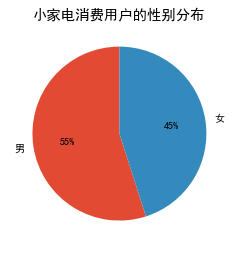

In [18]:
labels = ['男','女']
Y = [male_user, female_user]
fig = plt.figure()
plt.pie(Y, labels=labels, autopct='%1.0f%%', startangle=90) # startangle是图旋转角度
plt.title("小家电消费用户的性别分布")

# 小家电消费用户的年龄分布

In [19]:
user_age_df = user_info_df.groupby('ulp_base_age', as_index=False)['user_log_acct']\
                .agg({'user_age_count':'count'})
user_age_df

,ulp_base_age,user_age_count
0,-1,1688
1,1,21
2,2,27947
3,3,105501
4,4,56682
5,5,12177
6,6,11074


In [20]:
user_age_df['ulp_base_age'] = user_age_df['ulp_base_age'].astype('int')
user_age_df = user_age_df[user_age_df['ulp_base_age'] > 0]
user_age_df

,ulp_base_age,user_age_count
1,1,21
2,2,27947
3,3,105501
4,4,56682
5,5,12177
6,6,11074


<BarContainer object of 6 artists>

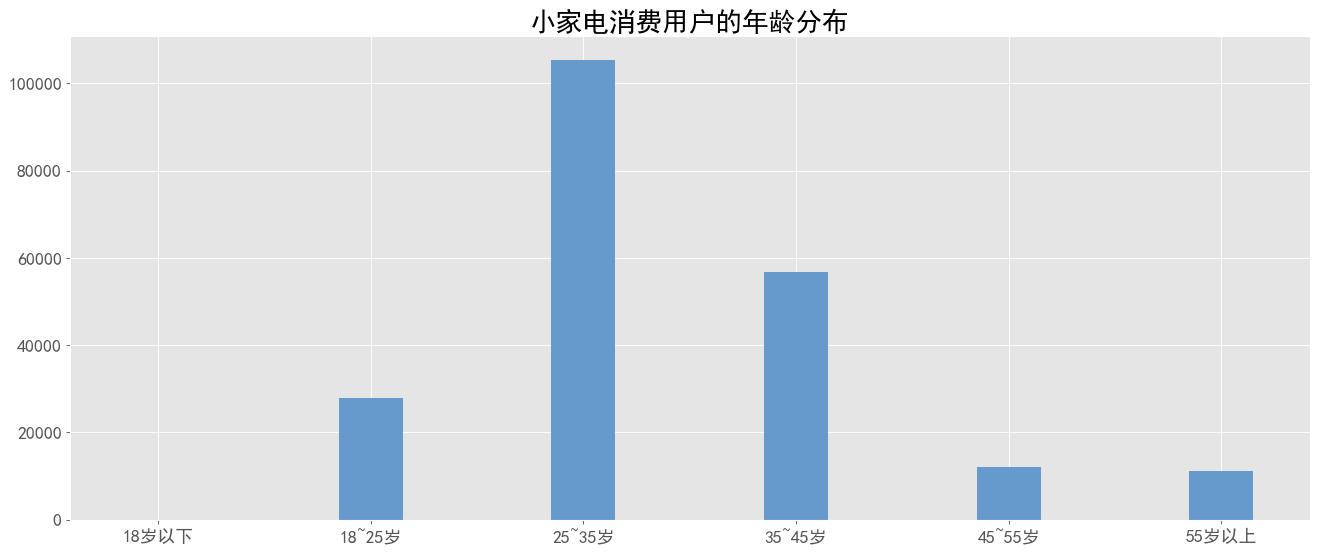

In [21]:
x = ['18岁以下', '18~25岁',  '25~35岁', '35~45岁', '45~55岁', '55岁以上']
y = user_age_df['user_age_count']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.title("小家电消费用户的年龄分布", size=24) # 图标题

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.bar(x, y, width=0.3, color='#6699CC')

# 用户的地域分布

In [22]:
user_region_df = user_info_df.groupby('ulp_addr_province', as_index=False)['user_log_acct'].\
                    agg({'region_count':'count'})
user_region_df.columns = ['province_name','region_count']
user_region_df = user_region_df.sort_values(by='region_count', ascending=False)
user_region_df

,province_name,region_count
12,广东,35247
15,江苏,19370
4,北京,19214
1,上海,14627
10,山东,14391
6,四川,11003
21,湖北,9504
19,浙江,9455
17,河北,8147
27,辽宁,7023


In [23]:
user_region_df = user_region_df[user_region_df['province_name'] != '-1']
user_region_df

,province_name,region_count
12,广东,35247
15,江苏,19370
4,北京,19214
1,上海,14627
10,山东,14391
6,四川,11003
21,湖北,9504
19,浙江,9455
17,河北,8147
27,辽宁,7023


In [24]:
x = user_region_df['province_name'][::-1] # 切片方法，让列表反向。两个冒号分隔为{起始位置：终止位置：步长}
y = user_region_df['region_count'][::-1] # 其中步长为正，从左往右取，步长为负，从右往左取

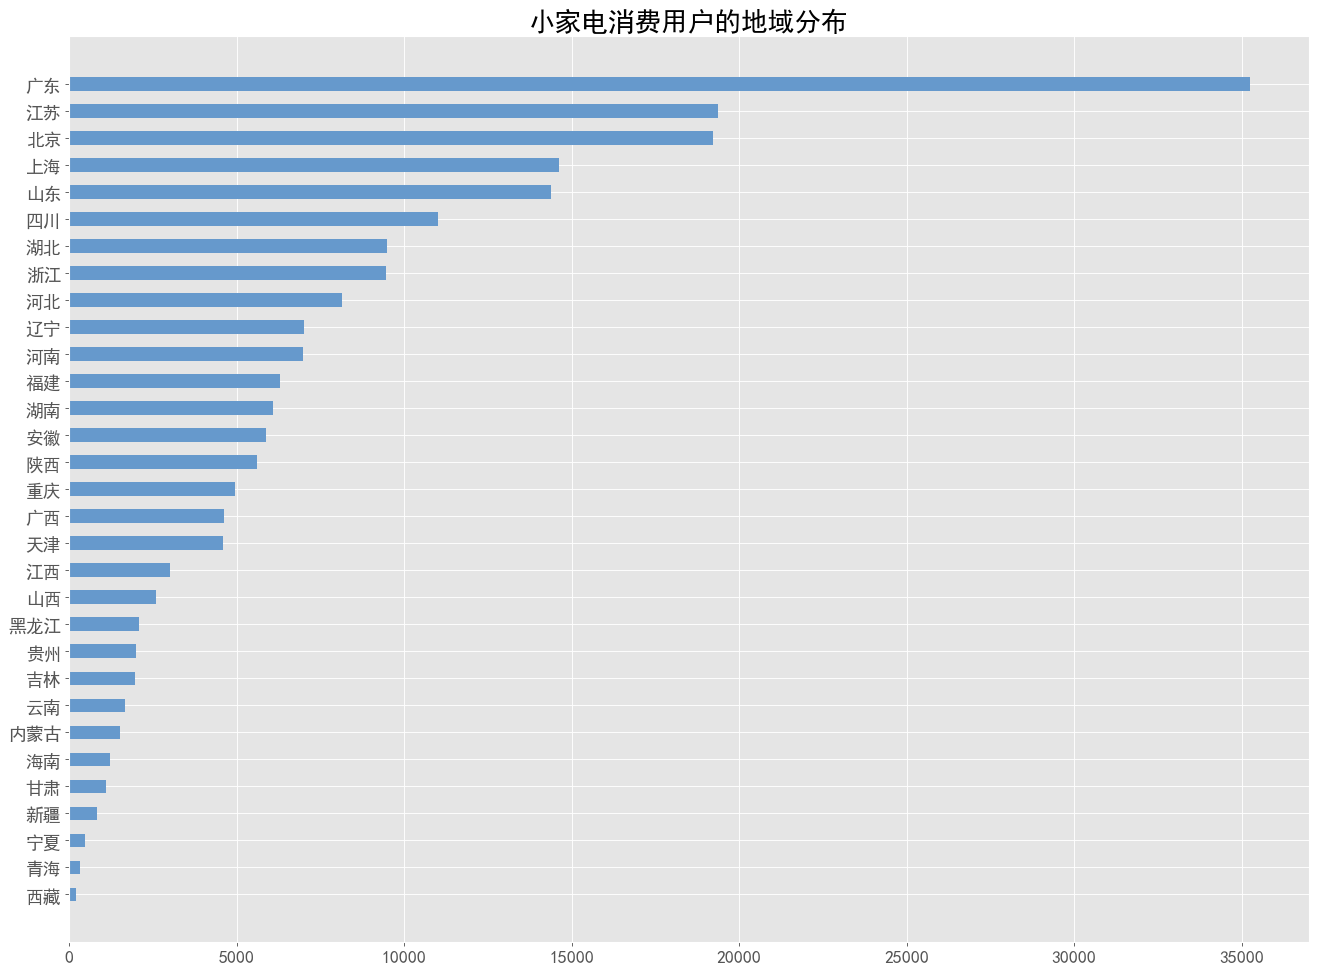

In [25]:
plt.figure(figsize=(20,15), dpi=80)

plt.title("小家电消费用户的地域分布", size=24) # 图标题

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.barh(x, y, height=0.5, color='#6699CC')

plt.show()

# 小家电消费用户的城市分布

In [26]:
user_city_df = user_info_df.groupby('ulp_addr_city', as_index=False)['user_log_acct']\
                .agg({'city_count':'count'})\
                .sort_values(by='city_count', ascending=False)
user_city_df

,ulp_addr_city,city_count
50,北京市,19214
6,上海市,14627
128,广州市,9674
217,深圳市,8839
146,成都市,6788
269,苏州市,5754
188,武汉市,5538
313,重庆市,4943
94,天津市,4585
343,青岛市,3786


In [27]:
user_city_df = user_city_df[:10]
user_city_df

,ulp_addr_city,city_count
50,北京市,19214
6,上海市,14627
128,广州市,9674
217,深圳市,8839
146,成都市,6788
269,苏州市,5754
188,武汉市,5538
313,重庆市,4943
94,天津市,4585
343,青岛市,3786


In [28]:
x = user_city_df['ulp_addr_city'][::-1]
y = user_city_df['city_count'][::-1]

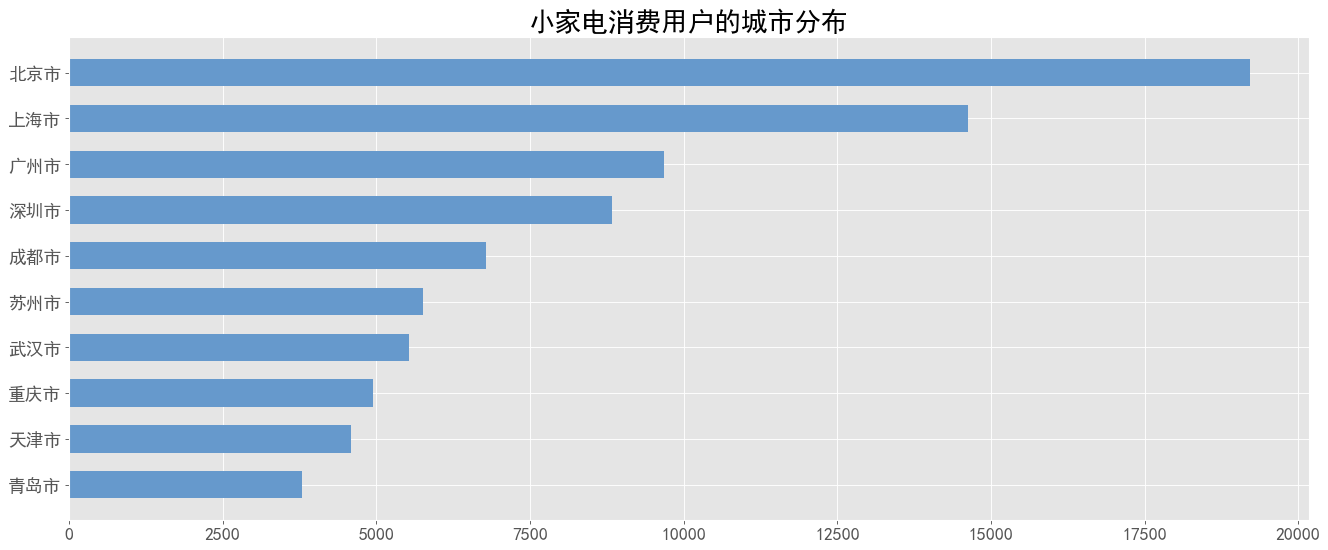

In [29]:
plt.figure(figsize=(20,8),dpi=80)

plt.title("小家电消费用户的城市分布", size=24) # 图标题

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.barh(x, y, align='center', height=0.6, color='#6699CC') # height是水平条形图宽度

plt.show()

# 用户的婚育状况

In [30]:
user_marriage_df = user_info_df.groupby('ulp_base_marriage', as_index=False)['user_log_acct']\
                    .agg({'marriage':'count'})\
                    .sort_values(by='marriage', ascending=False)
user_marriage_df

,ulp_base_marriage,marriage
2,1,143755
1,0,65802
0,-1,5533


In [31]:
married_user = user_marriage_df['marriage'].iloc[0] # 取第0行
unmarried_user = user_marriage_df['marriage'].iloc[1] # 取第1行

Text(0.5, 1.0, '小家电消费用户的婚姻情况')

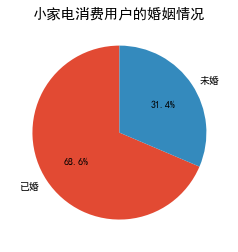

In [32]:
labels = ['已婚', '未婚']
Y = [married_user, unmarried_user]
fig = plt.figure()
plt.pie(Y, labels=labels, autopct='%1.1f%%', startangle=90) # startangle是图旋转角度
plt.title("小家电消费用户的婚姻情况")

# 小家电消费用户的有孩可能性

In [33]:
user_child_df = user_info_df.groupby('ulp_base_child', as_index=False)['user_log_acct']\
                .agg({'child':'count'})\
                .sort_values(by='child', ascending=False)
user_child_df

,ulp_base_child,child
0,-1,63774
3,较高,58209
4,高,38502
2,较低,29468
1,低,25137


In [34]:
user_child_df = user_child_df[user_child_df['ulp_base_child'] != '-1']
user_child_df

,ulp_base_child,child
3,较高,58209
4,高,38502
2,较低,29468
1,低,25137


In [35]:
very_high = user_child_df['child'].iloc[1] # 高，取第1行
high = user_child_df['child'].iloc[0] # 较高，取第0行
low = user_child_df['child'].iloc[2] # 较低，取第2行
very_low = user_child_df['child'].iloc[3] # 低，取第3行

Text(0.5, 1.0, '小家电消费用户的有孩可能性')

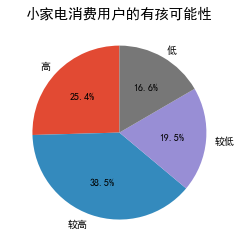

In [36]:
labels = ['高', '较高', '较低', '低']
Y = [very_high, high, low, very_low]
fig = plt.figure()
plt.pie(Y, labels=labels, autopct='%1.1f%%', startangle=90) # startangle是图旋转角度
plt.title("小家电消费用户的有孩可能性")

# 用户的教育水平

In [37]:
user_edu_df = user_info_df.groupby('ulp_base_education', as_index=False)['user_log_acct']\
                .agg({'edu':'count'})\
                .sort_values(by='ulp_base_education', ascending=True)
user_edu_df

,ulp_base_education,edu
0,-1,13872
1,1,3555
2,2,36788
3,3,131534
4,4,29341


In [38]:
user_edu_df = user_edu_df[user_edu_df['ulp_base_education'] != '-1']
user_edu_df

,ulp_base_education,edu
1,1,3555
2,2,36788
3,3,131534
4,4,29341


<BarContainer object of 4 artists>

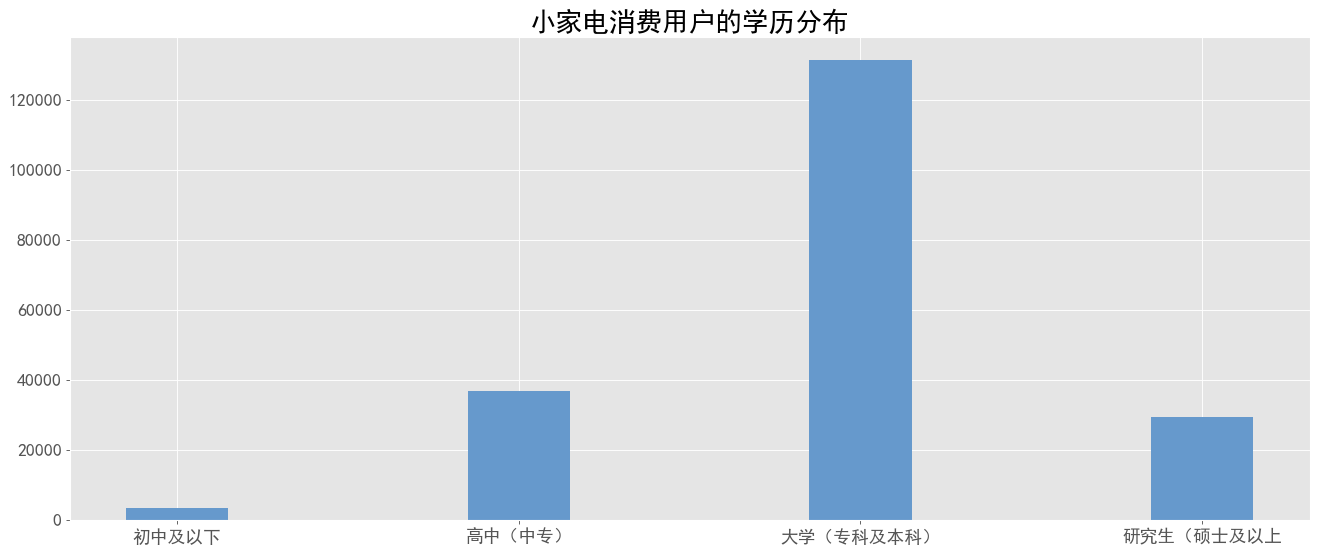

In [39]:
x = ['初中及以下', '高中（中专）', '大学（专科及本科）', '研究生（硕士及以上']
y = user_edu_df['edu']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.title("小家电消费用户的学历分布", size=24)

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.bar(x, y, width=0.3, color='#6699CC')

# 小家电消费用户的职业分布

In [40]:
user_profession_df = user_info_df.groupby('ulp_base_profession', as_index=False)['user_log_acct']\
                    .agg({'profession':'count'})\
                    .sort_values(by='ulp_base_profession', ascending=True)
user_profession_df

,ulp_base_profession,profession
0,-1,61755
1,a,3492
2,b,4268
3,c,10195
4,d,37080
5,e,14675
6,f,33167
7,g,40932
8,h,9526


In [41]:
user_profession_df = user_profession_df[user_profession_df['ulp_base_profession'] != '-1']
user_profession_df

,ulp_base_profession,profession
1,a,3492
2,b,4268
3,c,10195
4,d,37080
5,e,14675
6,f,33167
7,g,40932
8,h,9526


<BarContainer object of 8 artists>

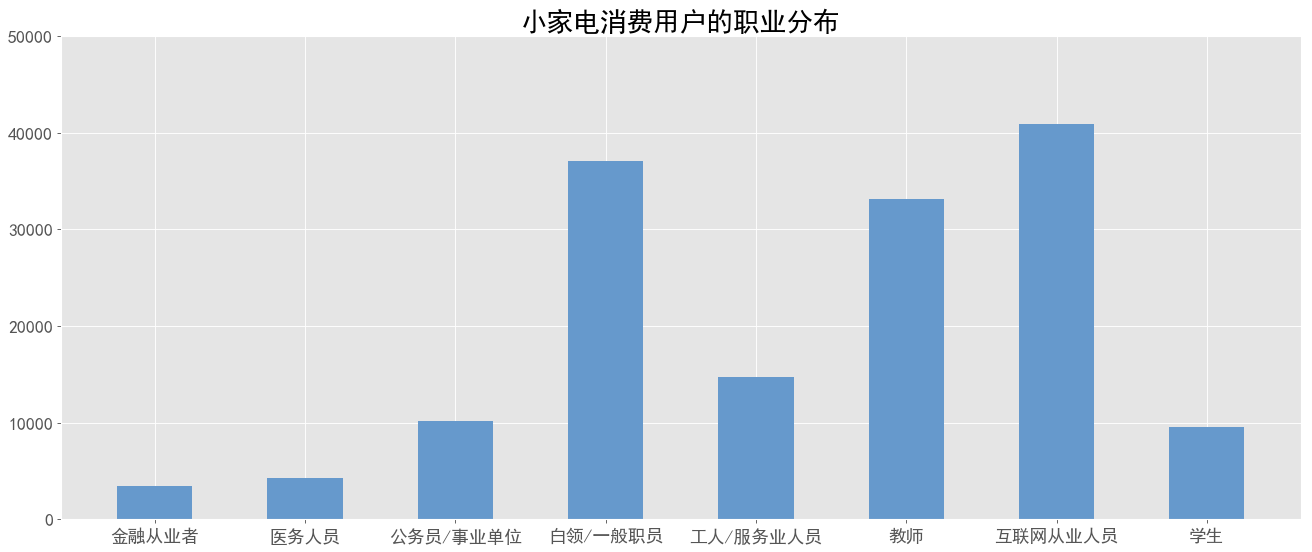

In [42]:
x = ['金融从业者', '医务人员', '公务员/事业单位', '白领/一般职员', '工人/服务业人员', '教师', '互联网从业人员', '学生']
y = user_profession_df['profession']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.ylim(ymax=50000) # y轴坐标最大值设为50000
plt.title("小家电消费用户的职业分布", size=24)

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.bar(x, y, width=0.5, color='#6699CC')

# 用户的购买商品类目分布

In [43]:
# 订单维度的分析， 使用的是有效订单

vaild_order_user_df = order_user_df[(order_user_df['sale_ord_valid_flag'] == 1)
                          &(order_user_df['cancel_flag'] == 0)
                          &(order_user_df['check_account_tm'] != 0)
                          &(order_user_df['before_prefr_unit_price'] != 0)
                          &(order_user_df['user_actual_pay_amount'] != 0)] # 筛选有效订单
vaild_order_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232599 entries, 9 to 607711
Data columns (total 65 columns):
user_log_acct              232599 non-null object
parent_sale_ord_id         232599 non-null object
sale_ord_id                232599 non-null object
sale_ord_tm                232599 non-null datetime64[ns]
sale_ord_dt                232599 non-null datetime64[ns]
item_sku_id                232599 non-null object
item_name                  232599 non-null object
brandname                  232599 non-null object
sale_qtty                  232599 non-null int32
item_first_cate_name       232599 non-null object
item_second_cate_name      232599 non-null object
item_third_cate_name       232599 non-null object
before_prefr_unit_price    232599 non-null float64
after_prefr_unit_price     232599 non-null float64
user_actual_pay_amount     232599 non-null float64
sale_ord_valid_flag        232599 non-null int32
cancel_flag                232599 non-null int32
check_account_tm       

In [44]:
user_order_cate_df = vaild_order_user_df.groupby('item_third_cate_name', as_index=False)['sale_ord_id']\
                    .agg({'cate_count':'count'})\
                    .sort_values(by='cate_count', ascending=False)
user_order_cate_df

,item_third_cate_name,cate_count
16,电风扇,74863
2,净水器,39712
20,饮水机,16847
3,加湿器,16240
5,吸尘器,15899
8,挂烫机/熨斗,13008
17,空气净化器,10383
1,冷风扇,9237
7,扫地机器人,8630
15,电话机,6085


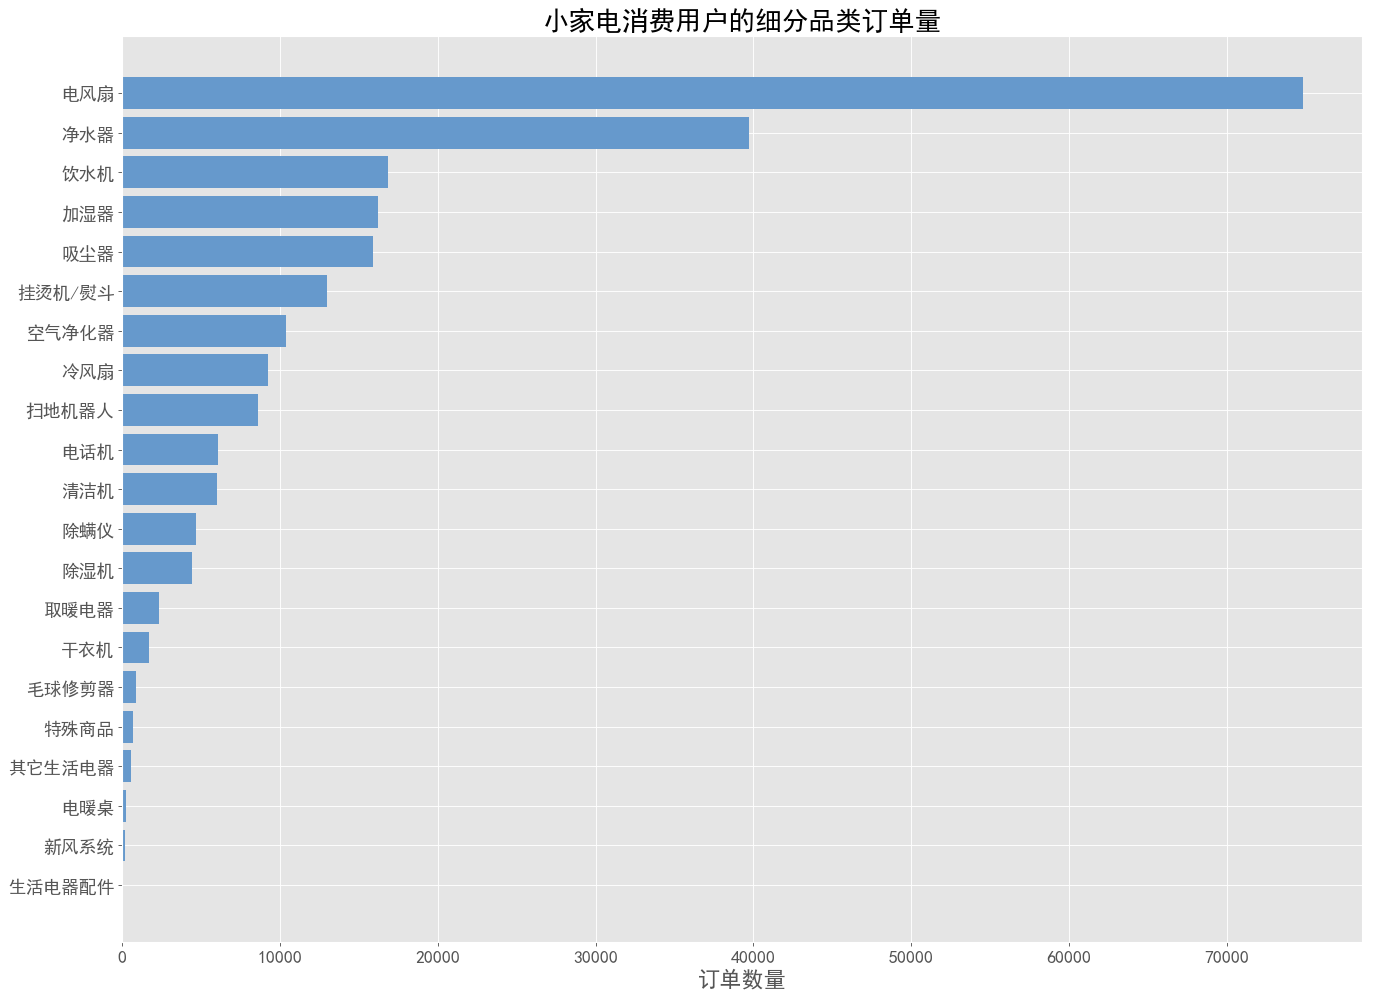

In [45]:
x = user_order_cate_df['item_third_cate_name'][::-1]
y = user_order_cate_df['cate_count'][::-1]

plt.figure(figsize=(20,15),dpi=80)
plt.xlabel('订单数量', size=20)
plt.barh(x, y, align='center', color='#6699CC')
plt.title("小家电消费用户的细分品类订单量", size=24)

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.show()

# 时间维度拆分订单数据

In [46]:
# 我们要按星期统计，所以要把时间按照星期几分组
# 先把时间变星期，再按星期分组

vaild_order_user_df_2 = vaild_order_user_df.copy()

# 将订单日期转化为星期，数字0—6，依次代表周日、周一、周二、周三、周四、周五、周六
vaild_order_user_df_2['order_time_week'] = vaild_order_user_df_2['sale_ord_tm'].apply(lambda x: x.strftime('%w'))
vaild_order_user_df_2

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cvl_glob_loyalty,cvl_glob_platform,cfv_sens_promotion,cfv_sens_comment,reg_user_type_cd,member_reg_gender,reg_birthday,last_login_tm,factory_user_flag,order_time_week
9,---刺猬,130744622338,124941786367,2020-08-18 18:11:35,2020-08-18,100001679413,安吉尔（Angel）茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,高度-忠诚型,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1,2
12,--寂,124775599894,124776112766,2020-08-15 12:49:06,2020-08-15,2392546,赛亿（Shinee）小风扇 台扇/台夹扇 壁扇 迷你静音学生宿舍床头办公室桌面换气电风扇FJ...,赛亿（Shinee）,1,家用电器,...,高度-忠诚型,-1.0,L1-4,L1-5,NaN,2,NaN,2020-02-25 15:01:41.0,1,6
16,-zhongzhong,124778603709,130550058117,2020-08-15 12:53:08,2020-08-15,100012373764,格力 （GREE）新品家用智能遥控定时电风扇/塔式落地扇/直流变频电扇/立式塔扇/无叶风扇F...,格力（GREE）,1,家用电器,...,高度-忠诚型,63.646321011381815,L1-3,L1-5,NaN,0,1986-10-22,2020-08-12 14:24:47.0,1,6
20,-万春强,130510311878,130510311878,2020-08-14 18:32:41,2020-08-14,4730589,碧然德（BRITA）滤水壶滤芯 Maxtra+多效滤芯8只装 过滤净水器滤芯 家用滤水壶滤芯...,碧然德,1,家用电器,...,高度-忠诚型,70.88769905463774,L1-4,L1-5,NaN,0,1968-2-2,2020-03-20 08:08:27.0,1,5
21,-古奈-,124710975645,124709548404,2020-08-14 09:28:55,2020-08-14,100006623913,爱丽思(IRIS)日本 电风扇/空气循环扇/台扇 办公桌家用台式静音迷你小风扇PCF-HEK15白,爱丽思（IRIS）,1,家用电器,...,高度-忠诚型,97.07339000986846,L1-4,L1-5,NaN,2,NaN,2019-02-22 10:50:12.0,1,5
26,-夜半未央-,130741983524,130741983524,2020-08-18 15:23:57,2020-08-18,6757781,长虹（CHANGHONG） 电风扇/台扇/家用风扇/五风叶大风量台式风扇 CFS-TD3511F,长虹（CHANGHONG）,2,家用电器,...,高度-忠诚型,96.10867489653504,L1-4,L1-5,1,1,1990-9-18,2019-11-19 11:16:11.0,0,2
27,-夜半未央-,130403870565,124648144981,2020-08-13 08:56:18,2020-08-13,790424,TCL 电话机座机 固定电话 办公家用 来电显示 免电池 座式壁挂 HCD868(17B)T...,TCL,1,家用电器,...,高度-忠诚型,96.10867489653504,L1-4,L1-5,1,1,1990-9-18,2019-11-19 11:16:11.0,0,4
29,-波塞冬-,124882072253,130673819849,2020-08-17 14:37:19,2020-08-17,5686539,思博润（SBREL）JDM-278 配飞利浦空气净化器滤网 滤芯ac4072、ac4074、...,思博润（SBREL）,2,家用电器,...,高度-忠诚型,83.70480692939799,L1-4,L1-5,1,2,NaN,2020-06-14 20:49:26.0,0,1
30,-波塞冬-,124882072253,130672687307,2020-08-17 14:37:19,2020-08-17,100003516144,格力（GREE）电风扇家用床头静音台扇 迷你办公室学生宿舍小风扇 FST-15X60g3,格力（GREE）,1,家用电器,...,高度-忠诚型,83.70480692939799,L1-4,L1-5,1,2,NaN,2020-06-14 20:49:26.0,0,1
32,-穿行者-,124869731478,124869731478,2020-08-17 11:21:09,2020-08-17,100002945513,小熊（Bear）电风扇 迷你USB手持充电式台式风扇 静音办公室桌面小型风扇 学生宿舍小风扇...,小熊（Bear）,1,家用电器,...,高度-忠诚型,92.45196094134268,L1-4,L1-5,NaN,2,NaN,2020-06-05 16:58:18.0,1,1


In [47]:
user_order_week_df = vaild_order_user_df_2.groupby('order_time_week', as_index=False)['sale_ord_id'].\
                                agg({'week_count':'count'}).sort_values(by='order_time_week', ascending=True)
user_order_week_df

,order_time_week,week_count
0,0,30201
1,1,29688
2,2,43686
3,3,21570
4,4,25485
5,5,30394
6,6,51575


In [48]:
user_order_week_df[0:1] # 0是周日

,order_time_week,week_count
0,0,30201


In [49]:
user_order_week_df[1:] # 1-6是周一到周六

,order_time_week,week_count
1,1,29688
2,2,43686
3,3,21570
4,4,25485
5,5,30394
6,6,51575


In [50]:
# 两个dataframe上下拼接，也就是把后面的dataframe，追加到前面dataframe的末尾
user_order_week_df_2 = user_order_week_df[1:].append(user_order_week_df[0:1])
user_order_week_df_2

,order_time_week,week_count
1,1,29688
2,2,43686
3,3,21570
4,4,25485
5,5,30394
6,6,51575
0,0,30201


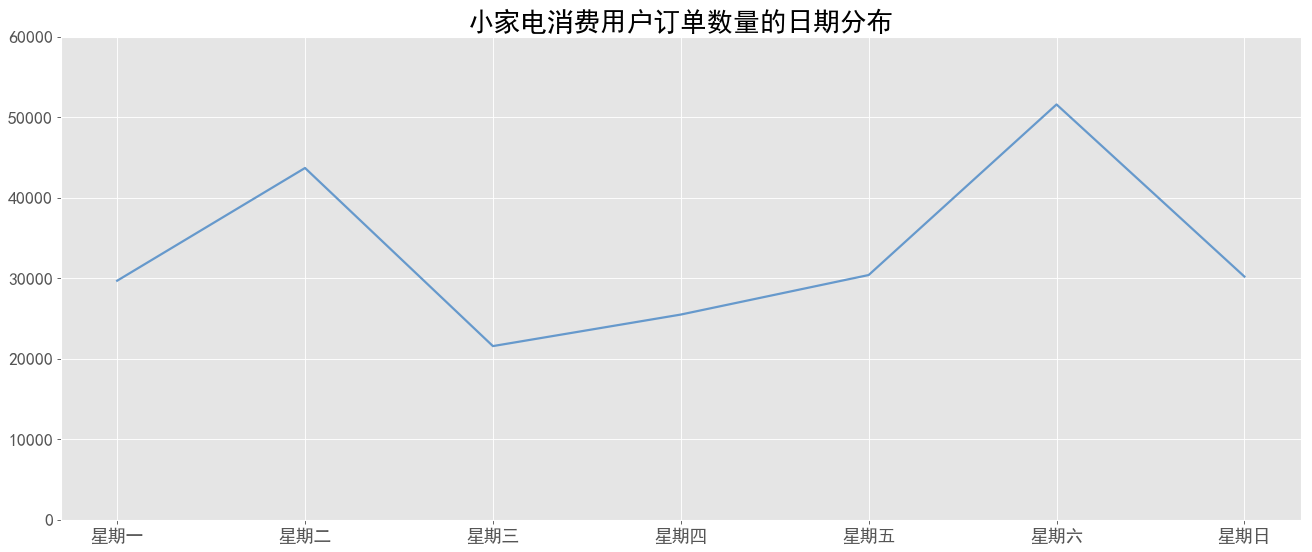

In [51]:
x = ['星期一', '星期二', '星期三', '星期四', '星期五', '星期六', '星期日']
y = user_order_week_df_2['week_count']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.ylim(ymin=0,ymax=60000) # y轴坐标，最小值0.最大值设为60000
plt.title("小家电消费用户订单数量的日期分布", size=24)

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.plot(x, y, linewidth=2.0, color='#6699CC', linestyle='-')

# 小家电消费用户订单数量的时间分布

In [52]:
# 把订单时间只保留小时
vaild_order_user_df_2['order_time_hms'] = vaild_order_user_df_2['sale_ord_tm']\
                                            .apply(lambda x: x.strftime('%H:00:00'))
vaild_order_user_df_2

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cvl_glob_platform,cfv_sens_promotion,cfv_sens_comment,reg_user_type_cd,member_reg_gender,reg_birthday,last_login_tm,factory_user_flag,order_time_week,order_time_hms
9,---刺猬,130744622338,124941786367,2020-08-18 18:11:35,2020-08-18,100001679413,安吉尔（Angel）茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1,2,18:00:00
12,--寂,124775599894,124776112766,2020-08-15 12:49:06,2020-08-15,2392546,赛亿（Shinee）小风扇 台扇/台夹扇 壁扇 迷你静音学生宿舍床头办公室桌面换气电风扇FJ...,赛亿（Shinee）,1,家用电器,...,-1.0,L1-4,L1-5,NaN,2,NaN,2020-02-25 15:01:41.0,1,6,12:00:00
16,-zhongzhong,124778603709,130550058117,2020-08-15 12:53:08,2020-08-15,100012373764,格力 （GREE）新品家用智能遥控定时电风扇/塔式落地扇/直流变频电扇/立式塔扇/无叶风扇F...,格力（GREE）,1,家用电器,...,63.646321011381815,L1-3,L1-5,NaN,0,1986-10-22,2020-08-12 14:24:47.0,1,6,12:00:00
20,-万春强,130510311878,130510311878,2020-08-14 18:32:41,2020-08-14,4730589,碧然德（BRITA）滤水壶滤芯 Maxtra+多效滤芯8只装 过滤净水器滤芯 家用滤水壶滤芯...,碧然德,1,家用电器,...,70.88769905463774,L1-4,L1-5,NaN,0,1968-2-2,2020-03-20 08:08:27.0,1,5,18:00:00
21,-古奈-,124710975645,124709548404,2020-08-14 09:28:55,2020-08-14,100006623913,爱丽思(IRIS)日本 电风扇/空气循环扇/台扇 办公桌家用台式静音迷你小风扇PCF-HEK15白,爱丽思（IRIS）,1,家用电器,...,97.07339000986846,L1-4,L1-5,NaN,2,NaN,2019-02-22 10:50:12.0,1,5,09:00:00
26,-夜半未央-,130741983524,130741983524,2020-08-18 15:23:57,2020-08-18,6757781,长虹（CHANGHONG） 电风扇/台扇/家用风扇/五风叶大风量台式风扇 CFS-TD3511F,长虹（CHANGHONG）,2,家用电器,...,96.10867489653504,L1-4,L1-5,1,1,1990-9-18,2019-11-19 11:16:11.0,0,2,15:00:00
27,-夜半未央-,130403870565,124648144981,2020-08-13 08:56:18,2020-08-13,790424,TCL 电话机座机 固定电话 办公家用 来电显示 免电池 座式壁挂 HCD868(17B)T...,TCL,1,家用电器,...,96.10867489653504,L1-4,L1-5,1,1,1990-9-18,2019-11-19 11:16:11.0,0,4,08:00:00
29,-波塞冬-,124882072253,130673819849,2020-08-17 14:37:19,2020-08-17,5686539,思博润（SBREL）JDM-278 配飞利浦空气净化器滤网 滤芯ac4072、ac4074、...,思博润（SBREL）,2,家用电器,...,83.70480692939799,L1-4,L1-5,1,2,NaN,2020-06-14 20:49:26.0,0,1,14:00:00
30,-波塞冬-,124882072253,130672687307,2020-08-17 14:37:19,2020-08-17,100003516144,格力（GREE）电风扇家用床头静音台扇 迷你办公室学生宿舍小风扇 FST-15X60g3,格力（GREE）,1,家用电器,...,83.70480692939799,L1-4,L1-5,1,2,NaN,2020-06-14 20:49:26.0,0,1,14:00:00
32,-穿行者-,124869731478,124869731478,2020-08-17 11:21:09,2020-08-17,100002945513,小熊（Bear）电风扇 迷你USB手持充电式台式风扇 静音办公室桌面小型风扇 学生宿舍小风扇...,小熊（Bear）,1,家用电器,...,92.45196094134268,L1-4,L1-5,NaN,2,NaN,2020-06-05 16:58:18.0,1,1,11:00:00


In [53]:
user_order_hms_df = vaild_order_user_df_2.groupby('order_time_hms', as_index=False)['sale_ord_id'].\
                                agg({'hms_count':'count'}).sort_values(by='order_time_hms', ascending=True)
user_order_hms_df

,order_time_hms,hms_count
0,00:00:00,13212
1,01:00:00,4087
2,02:00:00,1919
3,03:00:00,1242
4,04:00:00,892
5,05:00:00,1216
6,06:00:00,3052
7,07:00:00,5946
8,08:00:00,10058
9,09:00:00,13550


In [54]:
# 生成时间标签
hour_list = [x for x in range(0, 24)]
hour_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

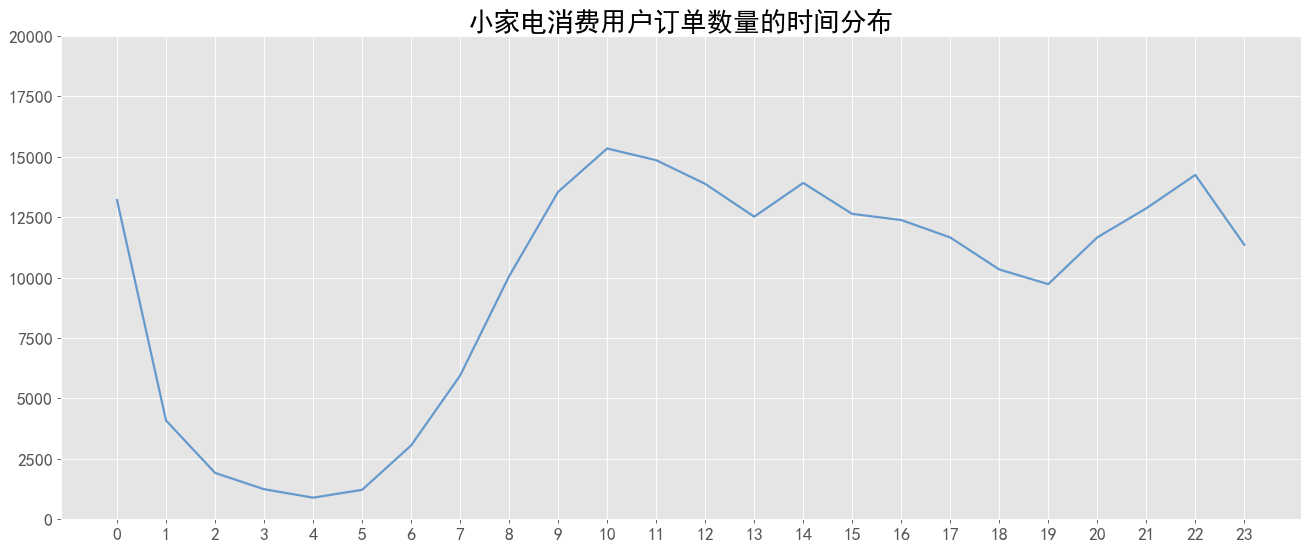

In [55]:
x = hour_list
y = user_order_hms_df['hms_count']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.ylim(ymin=0,ymax=20000) # y轴坐标，最小值0.最大值设为20000
plt.title("小家电消费用户订单数量的时间分布", size=24)

plt.xticks(x, size=16) # x轴显示内容及字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.plot(x, y, linewidth=2.0, color='#6699CC', linestyle='-', clip_on=False)

# 小家电消费用户的促销敏感度

In [56]:
# 按用户维度统计的量， 取全部用户的数据

cfv_sens_prom_df = user_info_df.groupby('cfv_sens_promotion', as_index=False)['user_log_acct']\
                    .agg({'cfv_sens_promotion_count':'count'})\
                    .sort_values(by='cfv_sens_promotion_count', ascending=False)
cfv_sens_prom_df

,cfv_sens_promotion,cfv_sens_promotion_count
4,L1-4,125582
2,L1-2,38494
3,L1-3,19832
5,L1-5,10249
1,L1-1,7757
6,L2-1,2864
7,L2-2,2152
10,L2-5,1495
14,L3-4,1189
0,-1,1172


In [57]:
user_info_df_2 = user_info_df.copy()
user_info_df_2 = user_info_df_2[user_info_df_2['cfv_sens_promotion'] != '-1']
user_info_df_2

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cvl_glob_values,cvl_glob_loyalty,cvl_glob_platform,cfv_sens_promotion,cfv_sens_comment,reg_user_type_cd,member_reg_gender,reg_birthday,last_login_tm,factory_user_flag
0,------1289,130704863113,124906164828,2020-08-18 00:02:10,2020-08-18,100009149228,飞利浦 (PHILIPS)蒸汽电熨斗家用 熨烫机 GC4902/28,飞利浦（PHILIPS）,2,家用电器,...,2.0375423,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0
7,---刺猬,130744622338,130744622338,2020-08-18 18:11:35,2020-08-18,100001679413,安吉尔（Angel）茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,1.8591628,高度-忠诚型,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1
10,--寂,124775599894,124775599894,2020-08-15 12:49:06,2020-08-15,2392546,赛亿（Shinee）小风扇 台扇/台夹扇 壁扇 迷你静音学生宿舍床头办公室桌面换气电风扇FJ...,赛亿（Shinee）,1,家用电器,...,3.1875074,高度-忠诚型,-1.0,L1-4,L1-5,NaN,2,NaN,2020-02-25 15:01:41.0,1
13,-love明-,130503457517,130501451054,2020-08-15 19:47:49,2020-08-15,3085665,松下（Panasonic）吸尘器MC-WF350手持式真空吸尘器家用超大吸力手提式系列吸尘器...,松下（Panasonic）,1,家用电器,...,9.721487,高度-忠诚型,69.12535255785926,L1-4,L1-5,NaN,0,1988-1-17,2020-08-08 20:34:47.0,1
16,-zhongzhong,124778603709,130550058117,2020-08-15 12:53:08,2020-08-15,100012373764,格力 （GREE）新品家用智能遥控定时电风扇/塔式落地扇/直流变频电扇/立式塔扇/无叶风扇F...,格力（GREE）,1,家用电器,...,18.505648,高度-忠诚型,63.646321011381815,L1-3,L1-5,NaN,0,1986-10-22,2020-08-12 14:24:47.0,1
20,-万春强,130510311878,130510311878,2020-08-14 18:32:41,2020-08-14,4730589,碧然德（BRITA）滤水壶滤芯 Maxtra+多效滤芯8只装 过滤净水器滤芯 家用滤水壶滤芯...,碧然德,1,家用电器,...,2.208288,高度-忠诚型,70.88769905463774,L1-4,L1-5,NaN,0,1968-2-2,2020-03-20 08:08:27.0,1
21,-古奈-,124710975645,124709548404,2020-08-14 09:28:55,2020-08-14,100006623913,爱丽思(IRIS)日本 电风扇/空气循环扇/台扇 办公桌家用台式静音迷你小风扇PCF-HEK15白,爱丽思（IRIS）,1,家用电器,...,1.7982377,高度-忠诚型,97.07339000986846,L1-4,L1-5,NaN,2,NaN,2019-02-22 10:50:12.0,1
25,-夜半未央-,130403870565,130403870565,2020-08-13 08:56:18,2020-08-13,790424,TCL 电话机座机 固定电话 办公家用 来电显示 免电池 座式壁挂 HCD868(17B)T...,TCL,1,家用电器,...,4.241383,高度-忠诚型,96.10867489653504,L1-4,L1-5,1,1,1990-9-18,2019-11-19 11:16:11.0,0
28,-波塞冬-,124882072253,124882072253,2020-08-17 14:37:19,2020-08-17,5686539,思博润（SBREL）JDM-278 配飞利浦空气净化器滤网 滤芯ac4072、ac4074、...,思博润（SBREL）,2,家用电器,...,4.906295,高度-忠诚型,83.70480692939799,L1-4,L1-5,1,2,NaN,2020-06-14 20:49:26.0,0
32,-穿行者-,124869731478,124869731478,2020-08-17 11:21:09,2020-08-17,100002945513,小熊（Bear）电风扇 迷你USB手持充电式台式风扇 静音办公室桌面小型风扇 学生宿舍小风扇...,小熊（Bear）,1,家用电器,...,6.3167768,高度-忠诚型,92.45196094134268,L1-4,L1-5,NaN,2,NaN,2020-06-05 16:58:18.0,1


In [58]:
cfv_sens_prom_df_2 = user_info_df_2.groupby('cfv_sens_promotion', as_index=False)['user_log_acct']\
                        .agg({'cfv_sens_promotion_count':'count'})\
                        .sort_values(by='cfv_sens_promotion_count', ascending=False)
cfv_sens_prom_df_2

,cfv_sens_promotion,cfv_sens_promotion_count
3,L1-4,125582
1,L1-2,38494
2,L1-3,19832
4,L1-5,10249
0,L1-1,7757
5,L2-1,2864
6,L2-2,2152
9,L2-5,1495
13,L3-4,1189
11,L3-2,769


In [59]:
user_info_df_2['sens_promotion'] = user_info_df_2['cfv_sens_promotion']\
                                    .apply(lambda x: x[-1]) # 只保留最后一位字符
user_info_df_2

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cvl_glob_loyalty,cvl_glob_platform,cfv_sens_promotion,cfv_sens_comment,reg_user_type_cd,member_reg_gender,reg_birthday,last_login_tm,factory_user_flag,sens_promotion
0,------1289,130704863113,124906164828,2020-08-18 00:02:10,2020-08-18,100009149228,飞利浦 (PHILIPS)蒸汽电熨斗家用 熨烫机 GC4902/28,飞利浦（PHILIPS）,2,家用电器,...,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0,4
7,---刺猬,130744622338,130744622338,2020-08-18 18:11:35,2020-08-18,100001679413,安吉尔（Angel）茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,高度-忠诚型,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1,2
10,--寂,124775599894,124775599894,2020-08-15 12:49:06,2020-08-15,2392546,赛亿（Shinee）小风扇 台扇/台夹扇 壁扇 迷你静音学生宿舍床头办公室桌面换气电风扇FJ...,赛亿（Shinee）,1,家用电器,...,高度-忠诚型,-1.0,L1-4,L1-5,NaN,2,NaN,2020-02-25 15:01:41.0,1,4
13,-love明-,130503457517,130501451054,2020-08-15 19:47:49,2020-08-15,3085665,松下（Panasonic）吸尘器MC-WF350手持式真空吸尘器家用超大吸力手提式系列吸尘器...,松下（Panasonic）,1,家用电器,...,高度-忠诚型,69.12535255785926,L1-4,L1-5,NaN,0,1988-1-17,2020-08-08 20:34:47.0,1,4
16,-zhongzhong,124778603709,130550058117,2020-08-15 12:53:08,2020-08-15,100012373764,格力 （GREE）新品家用智能遥控定时电风扇/塔式落地扇/直流变频电扇/立式塔扇/无叶风扇F...,格力（GREE）,1,家用电器,...,高度-忠诚型,63.646321011381815,L1-3,L1-5,NaN,0,1986-10-22,2020-08-12 14:24:47.0,1,3
20,-万春强,130510311878,130510311878,2020-08-14 18:32:41,2020-08-14,4730589,碧然德（BRITA）滤水壶滤芯 Maxtra+多效滤芯8只装 过滤净水器滤芯 家用滤水壶滤芯...,碧然德,1,家用电器,...,高度-忠诚型,70.88769905463774,L1-4,L1-5,NaN,0,1968-2-2,2020-03-20 08:08:27.0,1,4
21,-古奈-,124710975645,124709548404,2020-08-14 09:28:55,2020-08-14,100006623913,爱丽思(IRIS)日本 电风扇/空气循环扇/台扇 办公桌家用台式静音迷你小风扇PCF-HEK15白,爱丽思（IRIS）,1,家用电器,...,高度-忠诚型,97.07339000986846,L1-4,L1-5,NaN,2,NaN,2019-02-22 10:50:12.0,1,4
25,-夜半未央-,130403870565,130403870565,2020-08-13 08:56:18,2020-08-13,790424,TCL 电话机座机 固定电话 办公家用 来电显示 免电池 座式壁挂 HCD868(17B)T...,TCL,1,家用电器,...,高度-忠诚型,96.10867489653504,L1-4,L1-5,1,1,1990-9-18,2019-11-19 11:16:11.0,0,4
28,-波塞冬-,124882072253,124882072253,2020-08-17 14:37:19,2020-08-17,5686539,思博润（SBREL）JDM-278 配飞利浦空气净化器滤网 滤芯ac4072、ac4074、...,思博润（SBREL）,2,家用电器,...,高度-忠诚型,83.70480692939799,L1-4,L1-5,1,2,NaN,2020-06-14 20:49:26.0,0,4
32,-穿行者-,124869731478,124869731478,2020-08-17 11:21:09,2020-08-17,100002945513,小熊（Bear）电风扇 迷你USB手持充电式台式风扇 静音办公室桌面小型风扇 学生宿舍小风扇...,小熊（Bear）,1,家用电器,...,高度-忠诚型,92.45196094134268,L1-4,L1-5,NaN,2,NaN,2020-06-05 16:58:18.0,1,4


In [60]:
user_order_sens_promotion_df = user_info_df_2.groupby('sens_promotion', as_index=False)['user_log_acct']\
                                .agg({'sens_promotion_count':'count'})\
                                .sort_values(by='sens_promotion', ascending=True)
user_order_sens_promotion_df

,sens_promotion,sens_promotion_count
0,1,11785
1,2,41749
2,3,20968
3,4,127117
4,5,12299


<BarContainer object of 5 artists>

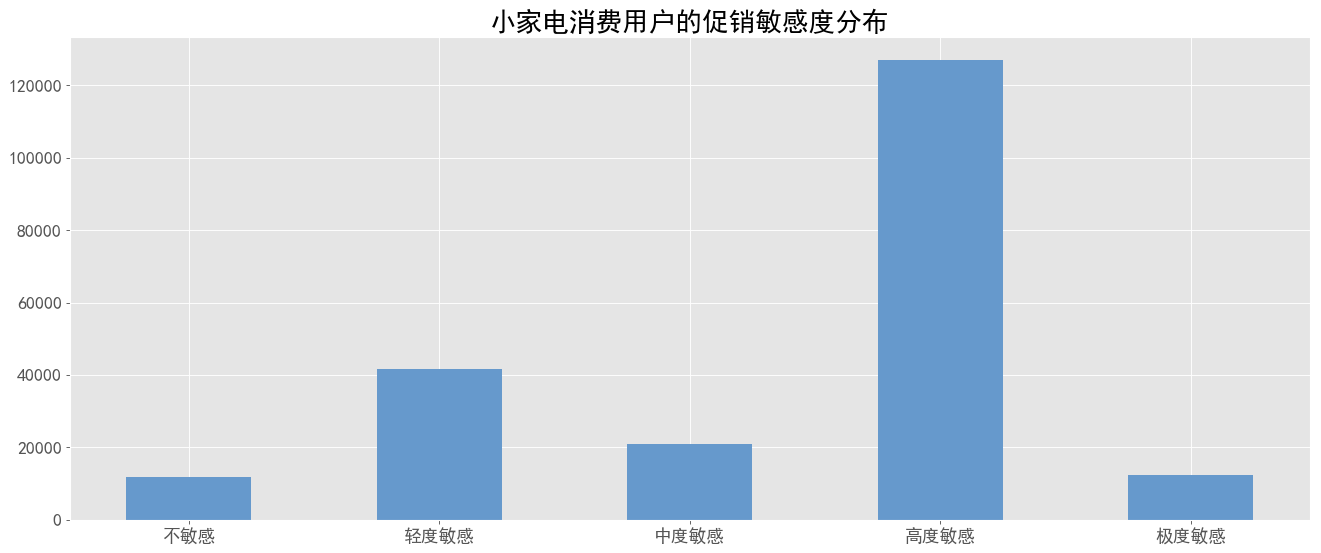

In [61]:
x = ['不敏感', '轻度敏感', '中度敏感', '高度敏感', '极度敏感']
y = user_order_sens_promotion_df['sens_promotion_count']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.title("小家电消费用户的促销敏感度分布", size=24)

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.bar(x, y, width=0.5, color='#6699CC')

# 小家电消费用户的评论敏感度

In [62]:
cfv_sens_comment_df = user_info_df.groupby('cfv_sens_comment', as_index=False)['user_log_acct']\
                    .agg({'cfv_sens_comment_count':'count'})\
                    .sort_values(by='cfv_sens_comment_count', ascending=False)
cfv_sens_comment_df

,cfv_sens_comment,cfv_sens_comment_count
5,L1-5,114354
4,L1-4,40077
3,L1-3,34562
2,L1-2,10837
1,L1-1,2672
9,L2-4,1928
15,L3-5,1856
10,L2-5,1687
8,L2-3,1434
7,L2-2,952


In [63]:
user_info_df_3 = user_info_df.copy()
user_info_df_3 = user_info_df[user_info_df['cfv_sens_comment'] != '-1']

In [64]:
cfv_sens_comment_df_2 = user_info_df_3.groupby('cfv_sens_comment', as_index=False)['user_log_acct']\
                    .agg({'cfv_sens_comment_count':'count'})\
                    .sort_values(by='cfv_sens_comment_count', ascending=False)
cfv_sens_comment_df_2

,cfv_sens_comment,cfv_sens_comment_count
4,L1-5,114354
3,L1-4,40077
2,L1-3,34562
1,L1-2,10837
0,L1-1,2672
8,L2-4,1928
14,L3-5,1856
9,L2-5,1687
7,L2-3,1434
6,L2-2,952


In [65]:
user_info_df_3['sens_comment'] = user_info_df_3['cfv_sens_comment']\
                                    .apply(lambda x: x[-1]) # 只保留最后一位字符
user_info_df_3

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cvl_glob_loyalty,cvl_glob_platform,cfv_sens_promotion,cfv_sens_comment,reg_user_type_cd,member_reg_gender,reg_birthday,last_login_tm,factory_user_flag,sens_comment
0,------1289,130704863113,124906164828,2020-08-18 00:02:10,2020-08-18,100009149228,飞利浦 (PHILIPS)蒸汽电熨斗家用 熨烫机 GC4902/28,飞利浦（PHILIPS）,2,家用电器,...,高度-忠诚型,77.97380894394887,L1-4,L1-4,1,0,1997-2-10,2020-08-11 22:55:05.0,0,4
7,---刺猬,130744622338,130744622338,2020-08-18 18:11:35,2020-08-18,100001679413,安吉尔（Angel）茶吧机立式家用办公室饮水机多功能自动上水柜式茶吧机下置水桶式CB2705...,安吉尔（Angel）,1,家用电器,...,高度-忠诚型,79.13798834497094,L1-2,L1-5,NaN,2,NaN,2019-12-11 18:29:44.0,1,5
10,--寂,124775599894,124775599894,2020-08-15 12:49:06,2020-08-15,2392546,赛亿（Shinee）小风扇 台扇/台夹扇 壁扇 迷你静音学生宿舍床头办公室桌面换气电风扇FJ...,赛亿（Shinee）,1,家用电器,...,高度-忠诚型,-1.0,L1-4,L1-5,NaN,2,NaN,2020-02-25 15:01:41.0,1,5
13,-love明-,130503457517,130501451054,2020-08-15 19:47:49,2020-08-15,3085665,松下（Panasonic）吸尘器MC-WF350手持式真空吸尘器家用超大吸力手提式系列吸尘器...,松下（Panasonic）,1,家用电器,...,高度-忠诚型,69.12535255785926,L1-4,L1-5,NaN,0,1988-1-17,2020-08-08 20:34:47.0,1,5
16,-zhongzhong,124778603709,130550058117,2020-08-15 12:53:08,2020-08-15,100012373764,格力 （GREE）新品家用智能遥控定时电风扇/塔式落地扇/直流变频电扇/立式塔扇/无叶风扇F...,格力（GREE）,1,家用电器,...,高度-忠诚型,63.646321011381815,L1-3,L1-5,NaN,0,1986-10-22,2020-08-12 14:24:47.0,1,5
20,-万春强,130510311878,130510311878,2020-08-14 18:32:41,2020-08-14,4730589,碧然德（BRITA）滤水壶滤芯 Maxtra+多效滤芯8只装 过滤净水器滤芯 家用滤水壶滤芯...,碧然德,1,家用电器,...,高度-忠诚型,70.88769905463774,L1-4,L1-5,NaN,0,1968-2-2,2020-03-20 08:08:27.0,1,5
21,-古奈-,124710975645,124709548404,2020-08-14 09:28:55,2020-08-14,100006623913,爱丽思(IRIS)日本 电风扇/空气循环扇/台扇 办公桌家用台式静音迷你小风扇PCF-HEK15白,爱丽思（IRIS）,1,家用电器,...,高度-忠诚型,97.07339000986846,L1-4,L1-5,NaN,2,NaN,2019-02-22 10:50:12.0,1,5
25,-夜半未央-,130403870565,130403870565,2020-08-13 08:56:18,2020-08-13,790424,TCL 电话机座机 固定电话 办公家用 来电显示 免电池 座式壁挂 HCD868(17B)T...,TCL,1,家用电器,...,高度-忠诚型,96.10867489653504,L1-4,L1-5,1,1,1990-9-18,2019-11-19 11:16:11.0,0,5
28,-波塞冬-,124882072253,124882072253,2020-08-17 14:37:19,2020-08-17,5686539,思博润（SBREL）JDM-278 配飞利浦空气净化器滤网 滤芯ac4072、ac4074、...,思博润（SBREL）,2,家用电器,...,高度-忠诚型,83.70480692939799,L1-4,L1-5,1,2,NaN,2020-06-14 20:49:26.0,0,5
32,-穿行者-,124869731478,124869731478,2020-08-17 11:21:09,2020-08-17,100002945513,小熊（Bear）电风扇 迷你USB手持充电式台式风扇 静音办公室桌面小型风扇 学生宿舍小风扇...,小熊（Bear）,1,家用电器,...,高度-忠诚型,92.45196094134268,L1-4,L1-5,NaN,2,NaN,2020-06-05 16:58:18.0,1,5


In [66]:
user_order_sens_comment_df = user_info_df_3.groupby('sens_comment', as_index=False)['user_log_acct']\
                                .agg({'sens_comment_count':'count'})\
                                .sort_values(by='sens_comment', ascending=True)
user_order_sens_comment_df

,sens_comment,sens_comment_count
0,1,3878
1,2,12546
2,3,36677
3,4,43288
4,5,118189


<BarContainer object of 5 artists>

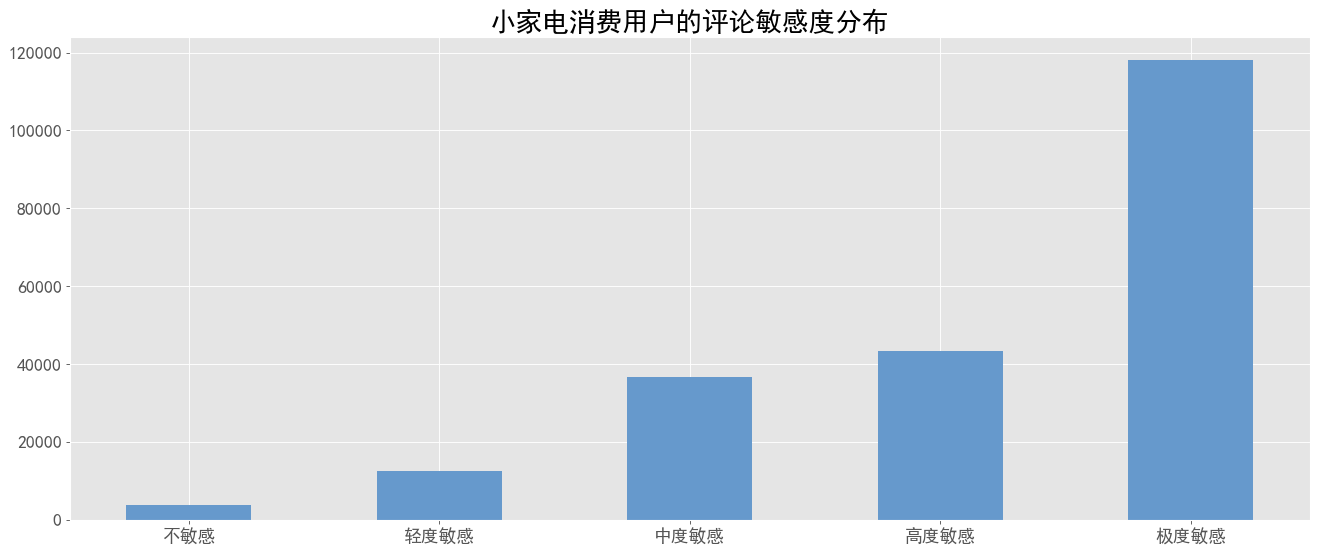

In [67]:
x = ['不敏感', '轻度敏感', '中度敏感', '高度敏感', '极度敏感']
y = user_order_sens_comment_df['sens_comment_count']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')

plt.title("小家电消费用户的评论敏感度分布", size=24)

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.bar(x, y, width=0.5, color='#6699CC')

# 小家电消费用户的加购次数分布

In [68]:
# 加购数据用的是xjd_user_cart

user_cart_df

,user_log_acct,item_sku_id,item_cate1_name,item_cate2_name,item_cate3_name,brand_name,main_brand_name,addcart_cnt,delcart_cnt,addcart_flag,delcart_flag,success_addcart_flag,addcart_modify_flag,afterord_delcart_flag,concern_cnt,dt
0,-万春强,100005514432,家用电器,生活电器,净水器,碧然德,碧然德,0,1,0,1,0,0,0,0,2020-08-19
1,-万春强,100004920782,家用电器,生活电器,净水器,小米（MI）,小米（MI）,0,1,0,1,0,0,0,0,2020-08-19
2,-万春强,2823062,家用电器,生活电器,净水器,碧然德,碧然德,0,1,0,1,0,0,0,0,2020-08-19
3,-万春强,68389838720,手机通讯,手机,手机,华为（HUAWEI）,华为（HUAWEI）,1,0,1,0,0,0,0,0,2020-08-15
4,-万春强,67150903788,家用电器,厨房小电,电饼铛,苏泊尔（SUPOR）,苏泊尔（SUPOR）,2,1,1,1,0,1,0,0,2020-08-19
5,-万春强,69627016135,家用电器,厨房小电,电饼铛,苏泊尔（SUPOR）,苏泊尔（SUPOR）,1,0,1,0,0,0,0,0,2020-08-19
6,-万春强,100013968358,医疗保健,护理护具,口罩,京东京造,京东京造,1,0,1,0,0,0,0,0,2020-08-15
7,-万春强,68615177311,家用电器,厨房小电,电饼铛,苏泊尔（SUPOR）,苏泊尔（SUPOR）,1,0,1,0,0,0,0,0,2020-08-19
8,-万春强,100012678280,家用电器,生活电器,净水器,HUAWEI Hilink,HUAWEI Hilink,1,0,1,0,0,0,0,0,2020-08-14
9,-万春强,100007472398,家用电器,生活电器,净水器,碧然德,碧然德,1,0,1,0,0,0,0,0,2020-08-14


In [69]:
user_cart_df['addcart_cnt'] = user_cart_df['addcart_cnt'].astype('int')
user_cart_df['addcart_flag'] = user_cart_df['addcart_flag'].astype('int')

In [70]:
# 筛选条件：加购次数>0 且 有效加购标志=1
user_cart_df = user_cart_df[(user_cart_df['addcart_cnt']>0) & (user_cart_df['addcart_flag']==1)]

In [71]:
user_cart_item_cate2_df = user_cart_df.groupby('item_cate2_name', as_index=False)['user_log_acct']\
                                .agg({'addcart_count':'nunique'})\
                                .sort_values(by='addcart_count', ascending=False)
user_cart_item_cate2_df

,item_cate2_name,addcart_count
277,生活电器,148055
99,厨房小电,28472
312,粮油调味,23926
4,个护健康,22400
401,饮料冲调,21691
126,大 家 电,20920
49,休闲食品,19499
252,清洁纸品,16778
358,身体护理,14325
250,清洁用具,13170


In [72]:
# 因为本身这些用户都是购买了小家电的用户，所以他们都会有小家电（也就是生活电器）类的加购
# 所以这里要把生活电器类的一项去掉

user_cart_item_cate2_df.drop([277], inplace=True)
user_cart_item_cate2_df

,item_cate2_name,addcart_count
99,厨房小电,28472
312,粮油调味,23926
4,个护健康,22400
401,饮料冲调,21691
126,大 家 电,20920
49,休闲食品,19499
252,清洁纸品,16778
358,身体护理,14325
250,清洁用具,13170
275,生活日用,13034


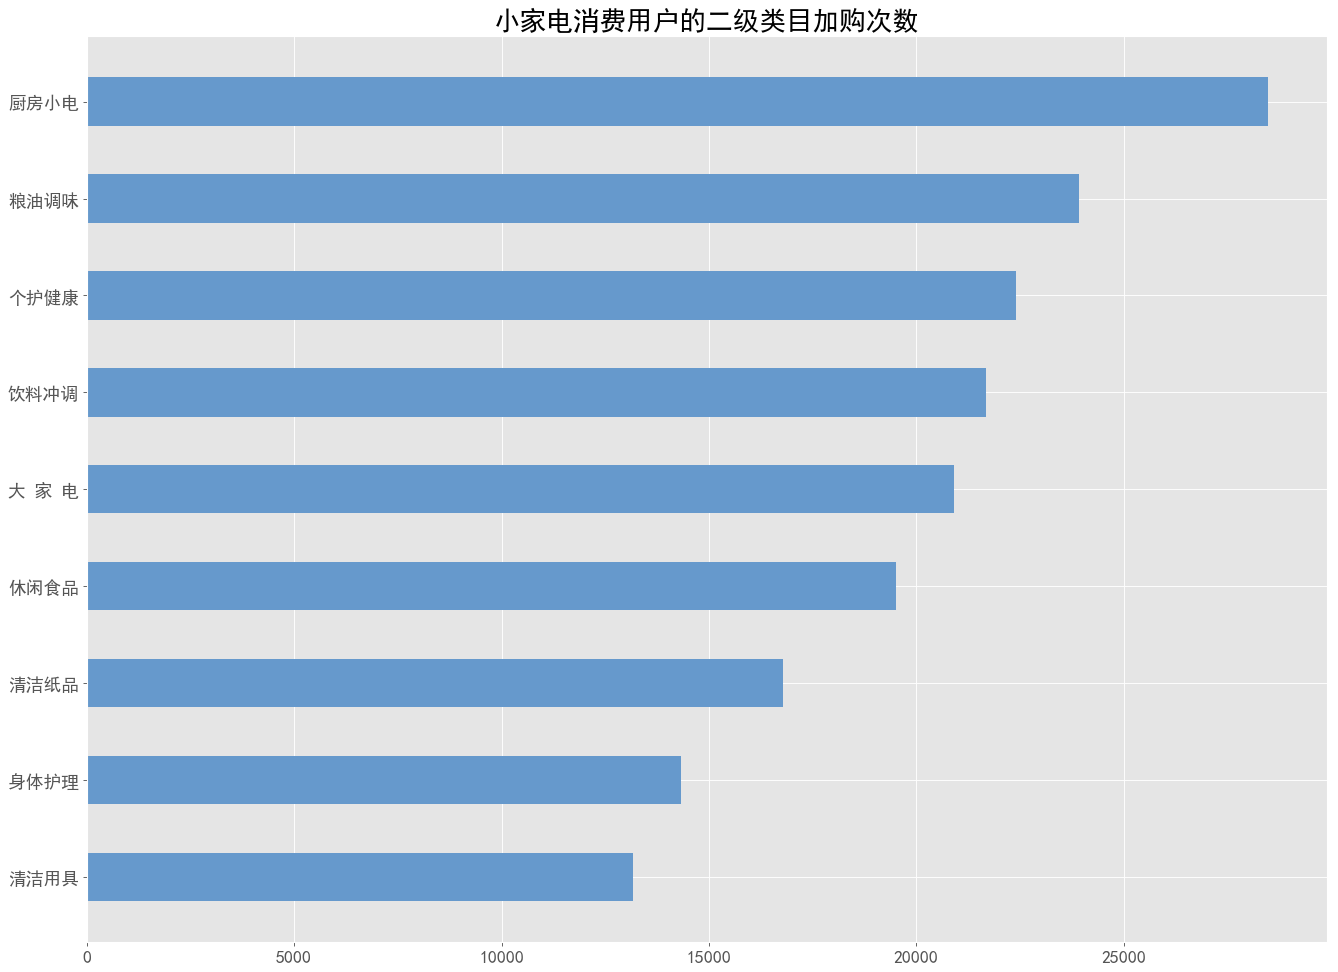

In [73]:
x = user_cart_item_cate2_df['item_cate2_name'][:9]
y = user_cart_item_cate2_df['addcart_count'][:9]

x = x[::-1] # 将x反向
y = y[::-1] # 将y反向

plt.figure(figsize=(20,15),dpi=80)

plt.title("小家电消费用户的二级类目加购次数", size=24)

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整

plt.barh(x, y, height=0.5, align='center', color='#6699CC')
plt.show()

# 小家电消费用户的三级类目加购次数--厨房小电

In [74]:
user_cart_item_cate3_df = user_cart_df[(user_cart_df['item_cate2_name']=='厨房小电')]
user_cart_item_cate3_df = user_cart_item_cate3_df.groupby('item_cate3_name', as_index=False)['user_log_acct']\
                                .agg({'addcart_count':'nunique'})\
                                .sort_values(by='addcart_count', ascending=False)
user_cart_item_cate3_df

,item_cate3_name,addcart_count
14,电水壶/热水瓶,5698
21,电饭煲,4712
23,破壁机,4064
24,空气炸锅,3639
5,多用途锅,3550
22,电饼铛,2713
6,微波炉,2396
13,电压力锅,2077
1,养生壶/煎药壶,2055
19,电磁炉,1984


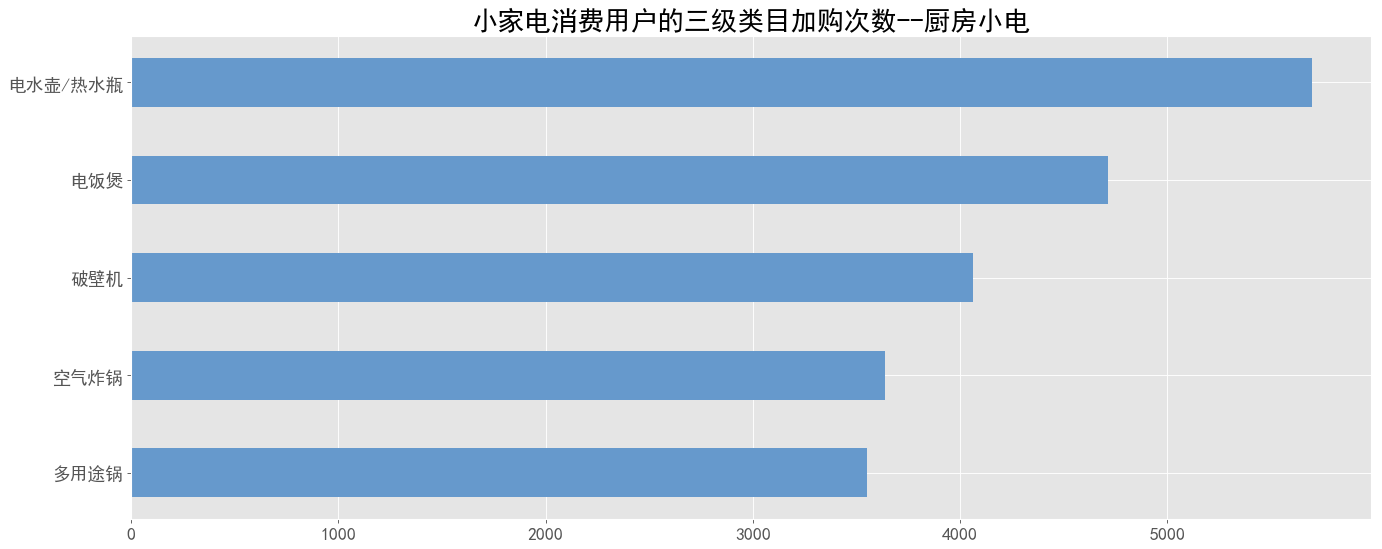

In [75]:
x = user_cart_item_cate3_df['item_cate3_name'][:5][::-1]
y = user_cart_item_cate3_df['addcart_count'][:5][::-1]

plt.figure(figsize=(20,8),dpi=80)

plt.title("小家电消费用户的三级类目加购次数--厨房小电", size=24)

plt.xticks(size=16) # x轴字体大小调整
plt.yticks(size=16) # y轴字体大小调整
plt.barh(x, y, height=0.5, align='center', color='#6699CC')

plt.show()